Overview:

This report presents investigation of baseball data. It is a data set containing complete batting and pitching statistics from 1871 to 2016, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. This project focuses on the unique salary structure of baseball. Following questions are explored: 1) Determing the salary structure of baseball, what factors drive a players salary. 2) Determining a relationship between player’s performance and salary. 3) What are the characteristics of some fo the highest earning pitchers and batters.

To take into consideration inflation, data of last 10 years is used for the calculations. Baseball has three player positions, of batter, pitcher and fielder. Here only batter and pitcher positions will be considered. Performance metrics used for batters are hits, home runs, batting average and runs batted in, and the performance metrics used for pitchers are earned runs average per 9 innings, striker outs, wins credited to the pitcher and loses credited to a pitcher.



The tables used for this report are: Master, Batting, Pitching, Salaries.

In [1]:
# importing libraries needed for the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#reading the data files using pandas csv reader
master = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/master.csv')
batting = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/batting.csv')
pitching = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/pitching.csv')
salaries = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/salaries.csv')

Data Wrangling:



The code below performs data wrangling. First, data from only the columns of interest is pulled from the main tables into new data frames called batting_df, pitching_df and salaries_df. The batting average for batters and earned runs average for pitchers is then calculated and added in new column in batting_df and pitching_df respectively. The data from salaries_df table is merged into the batting_df and pitching_df to get the players salary for each year.



Then data is cleaned to element all the NAN and missing values.

In [2]:
years =  pd.Series(range(2006,2017)) #considering analysis for last 10 years

# selecting only the columns required for batters metrics
colsB = ['playerID','yearID','teamID','lgID','G','R','H','HR','AB','RBI'] 

# selecting only the columns required for pitchers metrics
colsP = ['playerID','yearID','teamID','lgID','G','IPouts','ER','W','L','SO']

# buliding batters data frame
batting_df = pd.DataFrame(batting.loc[batting['yearID'].isin(years)], columns=colsB)
batting_df.loc[:,'BA'] = batting_df['H']/batting_df['AB']

# bulinding pithcers data frame
pitching_df = pd.DataFrame(pitching.loc[pitching['yearID'].isin(years)], columns=colsP)
pitching_df.loc[:,'ERA'] = (pitching_df['ER']/pitching_df['IPouts'])*9

# bulinding pithcers data frame
salaries_df = pd.DataFrame(salaries.loc[salaries['yearID'].isin(years)])

# Merging batting and pitching data with the players salary data
batting_sal = pd.merge(batting_df, salaries_df, how='left', on=['yearID', 'playerID', 'teamID','lgID'])
pitching_sal = pd.merge(pitching_df, salaries_df, how='left', on=['yearID', 'playerID', 'teamID','lgID'])

# cleaning up data:- replacing NAN values
batting_sal['salary'].fillna(0, inplace=True)
batting_sal['BA'].fillna(0, inplace=True)

pitching_sal['salary'].fillna(0, inplace=True)
pitching_sal['ERA'].fillna('', inplace=True)

Data Investigation:


To get the relation between each performance metric and salary, a correlation coefficient is calculated between each and plotted.

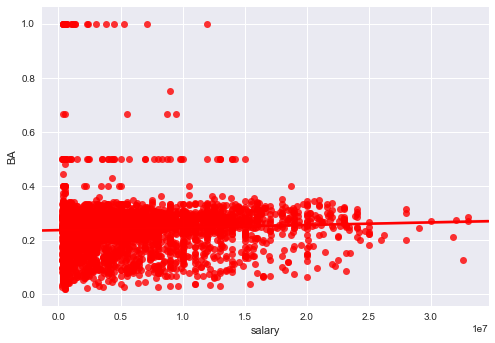

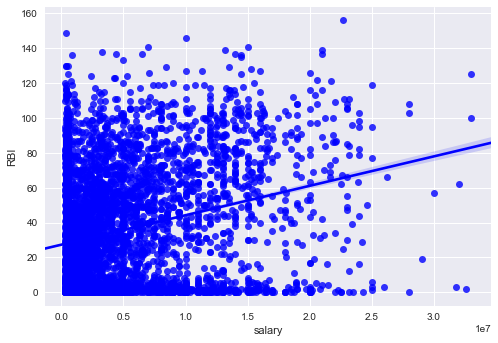

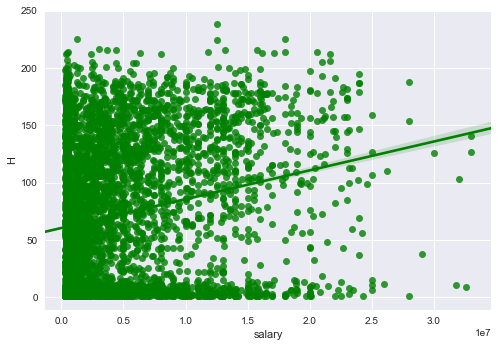

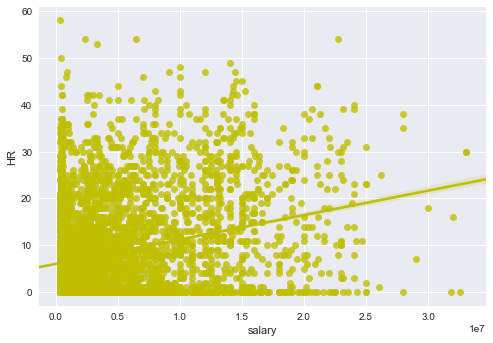

In [7]:
#shrinking data frame and choosing only players with grater than 0$ salary. 

colBC = ['H','HR','BA','RBI','salary']

batting_corr = pd.DataFrame(batting_sal.loc[(batting_sal['salary']!=0) & (batting_sal['BA']!=0)], columns=colBC)
sns.regplot(x=batting_corr.salary, y=batting_corr.BA, color="r", ci=68)
sns.plt.show()
sns.regplot(x=batting_corr.salary, y=batting_corr.RBI, color="b", ci=68)
sns.plt.show()
sns.regplot(x=batting_corr.salary, y=batting_corr.H, color="g", ci=68)
sns.plt.show()
sns.regplot(x=batting_corr.salary, y=batting_corr.HR, color="y", ci=68)
sns.plt.show()



  


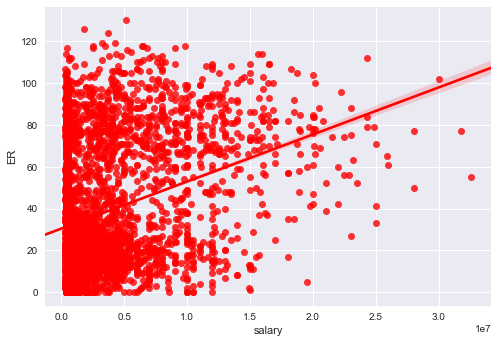

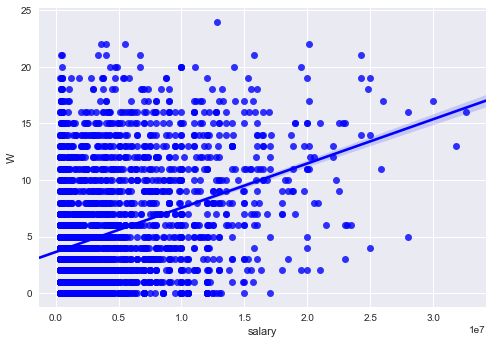

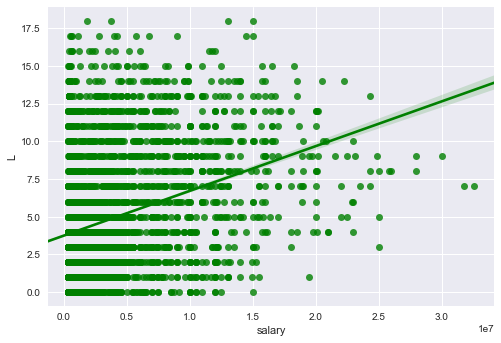

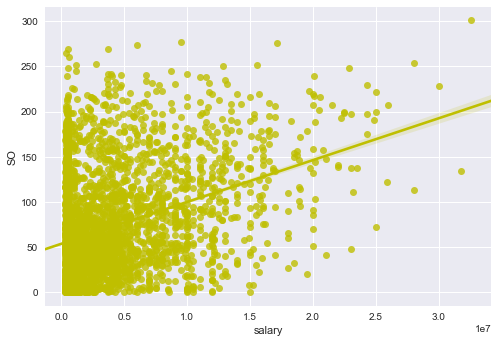

In [8]:
colPC = ['ER','W','L','SO','salary']

pitching_corr = pd.DataFrame(pitching_sal.loc[(pitching_sal['salary']!=0)], columns=colPC)
sns.regplot(x=pitching_corr.salary, y=pitching_corr.ER, color="r", ci=68)
sns.plt.show()
sns.regplot(x=pitching_corr.salary, y=pitching_corr.W, color="b", ci=68)
sns.plt.show()
sns.regplot(x=pitching_corr.salary, y=pitching_corr.L, color="g", ci=68)
sns.plt.show()
sns.regplot(x=pitching_corr.salary, y=pitching_corr.SO, color="y", ci=68)
sns.plt.show()

Observations:

Conclusion: